In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns

In [3]:
from google.colab import files

1. Load the dataset in Python environment

In [4]:
data = pd.read_csv('/content/train_loan.csv')

In [5]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


2. Perform different preprocessing steps

a. Missing value handling

In [11]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt

Checking missing values

In [13]:
data.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [14]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [15]:
data[data['Credit_History']==0]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
17,LP001036,Female,No,0,Graduate,No,3510,0.0,76.0,360.0,0.0,Urban,N
20,LP001043,Male,Yes,0,Not Graduate,No,7660,0.0,104.0,360.0,0.0,Urban,N
22,LP001047,Male,Yes,0,Not Graduate,No,2600,1911.0,116.0,360.0,0.0,Semiurban,N
23,LP001050,NaN,Yes,2,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
576,LP002872,NaN,Yes,0,Graduate,No,3087,2210.0,136.0,360.0,0.0,Semiurban,N
584,LP002911,Male,Yes,1,Graduate,No,2787,1917.0,146.0,360.0,0.0,Rural,N
589,LP002926,Male,Yes,2,Graduate,Yes,2726,0.0,106.0,360.0,0.0,Semiurban,N
597,LP002943,Male,No,NaN,Graduate,No,2987,0.0,88.0,360.0,0.0,Semiurban,N


<function matplotlib.pyplot.show(close=None, block=None)>

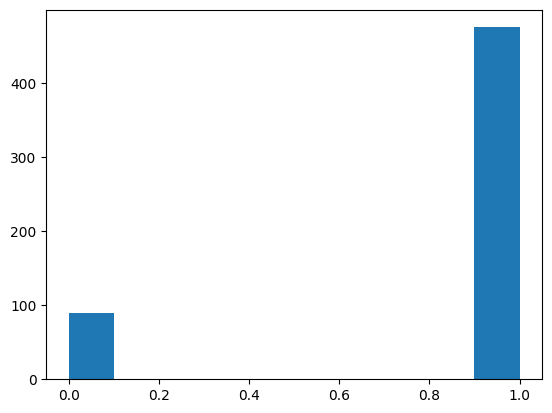

In [21]:
plt.hist(data['Credit_History'])
plt.show

In [29]:
data['Credit_History'].value_counts()

,count
Credit_History,
1.0,475
0.0,89


In [30]:
 data['Credit_History'].mode()

,Credit_History
0,1.0


In [31]:
data['Credit_History'] = data['Credit_History'].fillna(data['Credit_History'].mode(0))

plotting histogram of LoanAmount

<function matplotlib.pyplot.show(close=None, block=None)>

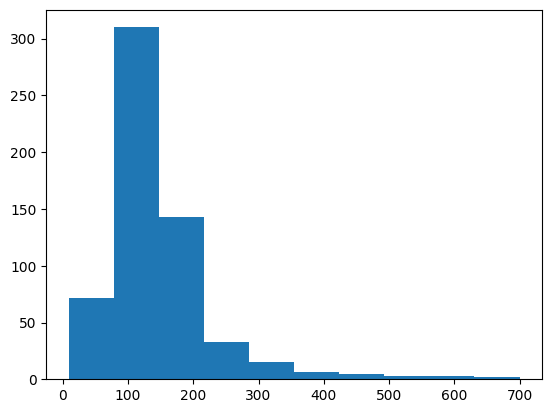

In [20]:
plt.hist(data['LoanAmount'])
plt.show

checking histogram of Credit_History

> Add blockquote



In [28]:
data['Credit_History'].value_counts()

,count
Credit_History,
1.0,475
0.0,89


checking histogram of Loan_Amount_Term

<function matplotlib.pyplot.show(close=None, block=None)>

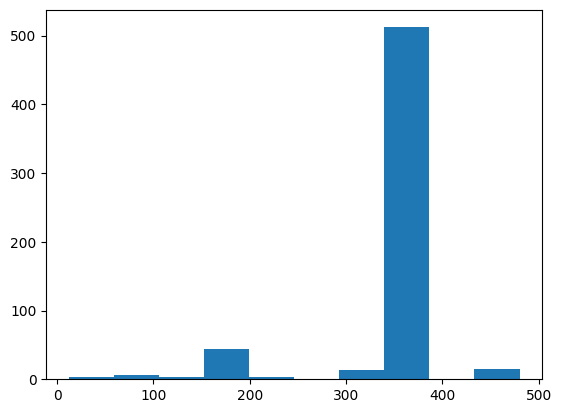

In [23]:
plt.hist(data['Loan_Amount_Term'])
plt.show

In [22]:
data['LoanAmount'] = data['LoanAmount'].fillna(data['LoanAmount'].median())

In [32]:
data.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,14


In [33]:
 data['Credit_History'].mode()

,Credit_History
0,1.0


In [34]:
data['Credit_History'] = data['Credit_History'].fillna(data['Credit_History'].mode()[0])

In [35]:
data.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,14


In [36]:
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].median())

In [37]:
data['Dependents'] = data['Dependents'].fillna(data['Dependents'].mode()[0])

In [38]:
data['married'] = data['Married'].fillna(data['Married'].mode()[0])

In [39]:
data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])

In [40]:
data['Self_Employed'] = data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])

In [41]:
data.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,3
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


b. Outlier detection

In [ ]:
# Inspection using Box Plot

<function matplotlib.pyplot.show(close=None, block=None)>

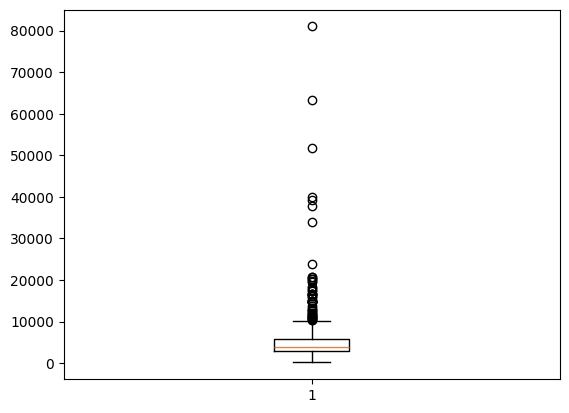

In [42]:
plt.boxplot(data['ApplicantIncome'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

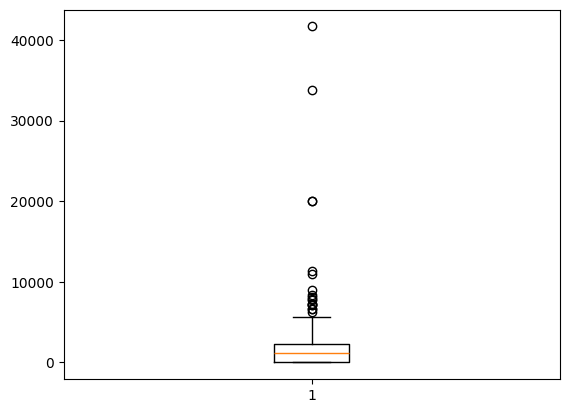

In [43]:
plt.boxplot(data['CoapplicantIncome'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

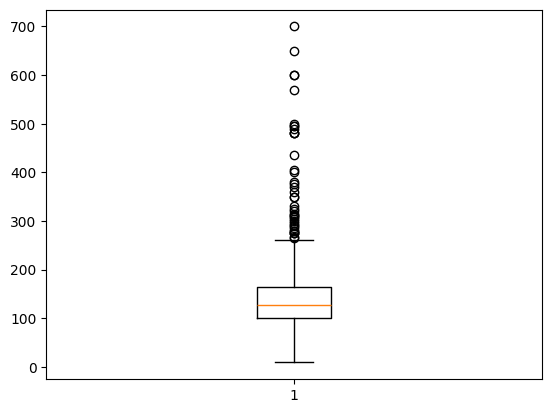

In [44]:
plt.boxplot(data['LoanAmount'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

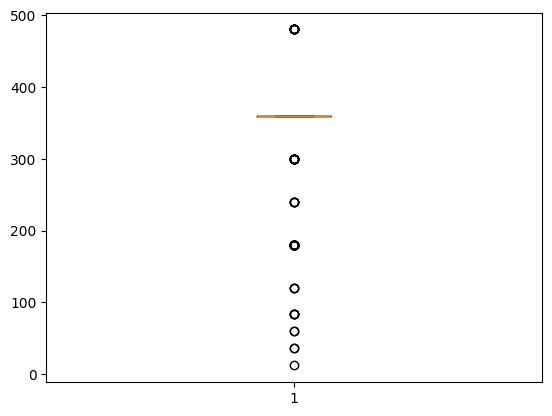

In [45]:
plt.boxplot(data['Loan_Amount_Term'])
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

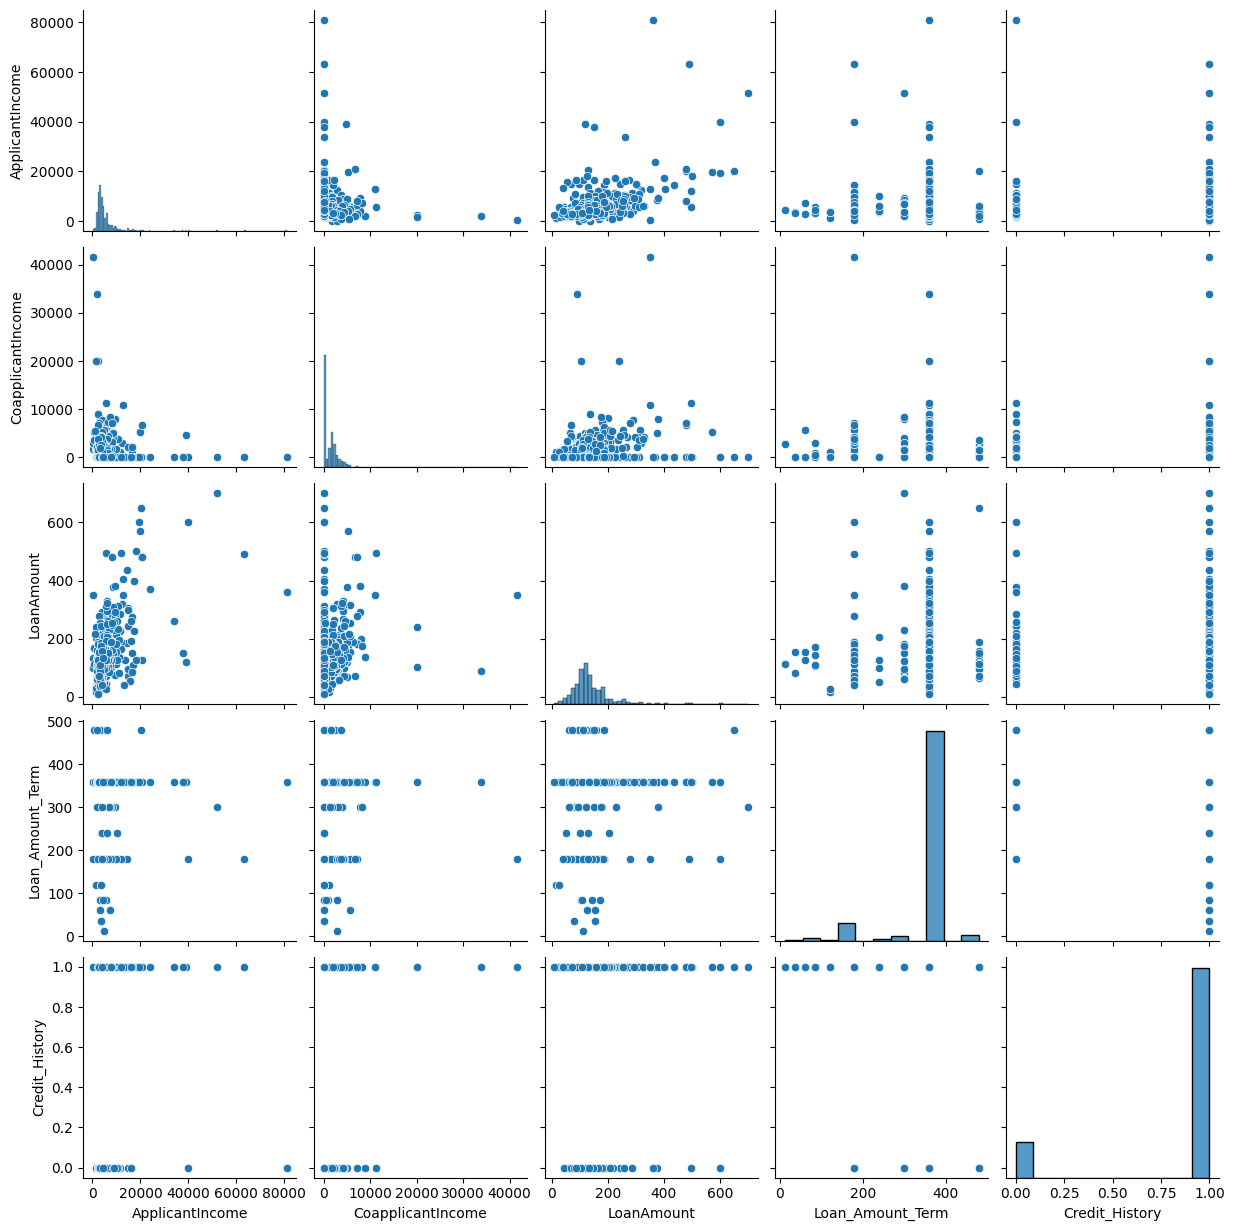

In [46]:
sns.pairplot(data)
plt.show

IQR Method
calculate the IQR

calculate the IQR of ApplicatIncome

In [47]:
q1 = data['ApplicantIncome'].quantile(0.25)
q3 = data['ApplicantIncome'].quantile(0.75)
iqr = q3 - q1

In [48]:
data = data[~((data['ApplicantIncome'] < (q1 - 1.5 * iqr)) | (data['ApplicantIncome'] > (q3 + 1.5 * iqr)))]

calculate the IQR of CoapplicantIncome

In [49]:
q1 = data['CoapplicantIncome'].quantile(0.25)
q3 = data['CoapplicantIncome'].quantile(0.75)
iqr = q3 - q1

In [50]:
data = data[~((data['CoapplicantIncome'] < (q1 - 1.5 * iqr)) | (data['CoapplicantIncome'] > (q3 + 1.5 * iqr)))]

calculate the IQR of LoanAmount

In [51]:
q1  = data['LoanAmount'].quantile(0.25)
q3 = data['LoanAmount'].quantile(0.75)
iqr = q3 - q1

In [52]:
data = data[~((data['LoanAmount'] < (q1 - 1.5 * iqr)) | (data['LoanAmount'] > (q3 + 1.5 * iqr)))]

calculate the IQR of Loan_Amount_Term

In [53]:
q1  = data['Loan_Amount_Term'].quantile(0.25)
q3 = data['Loan_Amount_Term'].quantile(0.75)
iqr = q3 - q1

In [54]:
data = data[~((data['Loan_Amount_Term'] < (q1 - 1.5 * iqr)) | (data['Loan_Amount_Term'] > (q3 + 1.5 * iqr)))]

c. Encoding

1) Label Encoding

Label Encoding assigns a unique integer to each category in a column. This method works best for binary categorical variables (two unique values).

In [55]:
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])
data['Married'] = le.fit_transform(data['Married'])
data['Dependents'] = le.fit_transform(data['Dependents'])

2) One hot Encoding

One-Hot Encoding creates a new column for each category in a categorical variable, assigning a 1 or 0 to represent its presence.

In [56]:
data = pd.get_dummies(data, columns=['Education', 'Self_Employed', 'Property_Area'])

d. Scaling

Standard Scaling transforms features to have a mean of 0 and a standard deviation of 1. This is effective when the data follows a Gaussian (normal) distribution.

In [57]:
# Standard Scaling
scaler = StandardScaler()
data[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']] = scaler.fit_transform(data[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']])